# Time Series Forecasting with ARIMA

Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting. If you want to learn Time Series Forecasting with ARIMA, this article is for you. In this article, I will take you through the task of Time Series Forecasting with ARIMA using the Python programming language.

In [1]:
!pip install yfinance

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import yfinance as yf

In [4]:
import datetime

In [5]:
from datetime import date, timedelta

In [6]:
import plotly.graph_objects as go

In [7]:
import plotly.express as px

In [8]:
today = date.today()

In [9]:
d1 = today.strftime("%Y-%m-%d")

In [10]:
end_date = d1

In [11]:
d2 = date.today() - timedelta(days=365) 

In [12]:
d2 = d2.strftime("%Y-%m-%d")

In [13]:
start_date = d2

In [14]:
data = yf.download('GOOG', start=start_date,end=end_date,progress=False)

C:\Users\Mugeesuddin16\AppData\Local\Temp\ipykernel_15300\1738857566.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GOOG', start=start_date,end=end_date,progress=False)


In [15]:
data["Date"] = data.index

In [16]:
data = data[["Date","Open","High","Low","Close","Volume"]]

In [17]:
data.reset_index(drop=True, inplace=True)

In [18]:
print(data.tail())

Price        Date        Open        High         Low       Close    Volume
Ticker                   GOOG        GOOG        GOOG        GOOG      GOOG
244    2025-10-13  241.029999  244.990005  240.750000  244.639999  12465000
245    2025-10-14  241.755005  248.024994  241.177994  246.190002  17705400
246    2025-10-15  248.085007  252.759995  246.789993  251.710007  16048100
247    2025-10-16  252.464996  257.579987  250.669998  251.880005  18946000
248    2025-10-17  251.350006  254.880005  248.589996  253.789993  17586000


We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [19]:
data = data[["Date","Close"]]

In [20]:
print(data.head())

Price        Date       Close
Ticker                   GOOG
0      2024-10-21  165.077515
1      2024-10-22  166.093079
2      2024-10-23  163.763260
3      2024-10-24  163.813049
4      2024-10-25  166.262314


Now let’s visualize the close prices of Google before moving forward:

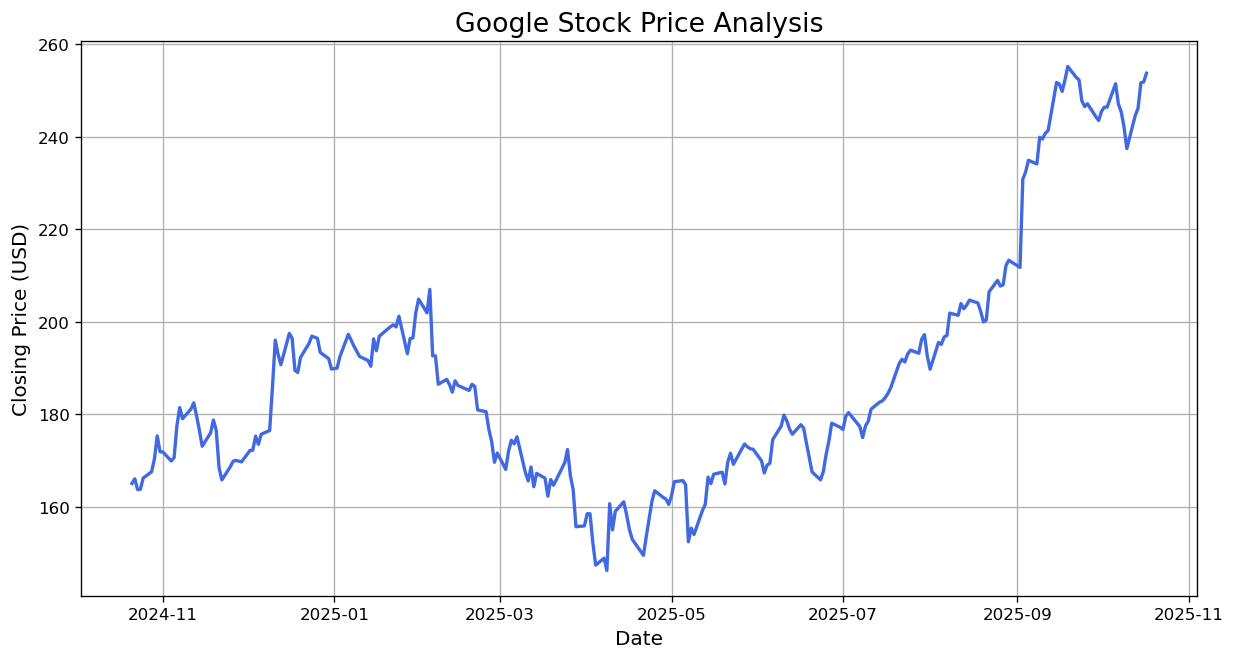

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=120)  # width=12 inches, height=6 inches, resolution=120 DPI
plt.plot(data["Date"], data["Close"], color='royalblue', linewidth=2)
plt.title("Google Stock Price Analysis", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.grid(True)
plt.show()


# Using ARIMA for Time Series Forecasting

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
result = seasonal_decompose(data["Close"], model='multiplicative',period=30)

In [24]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

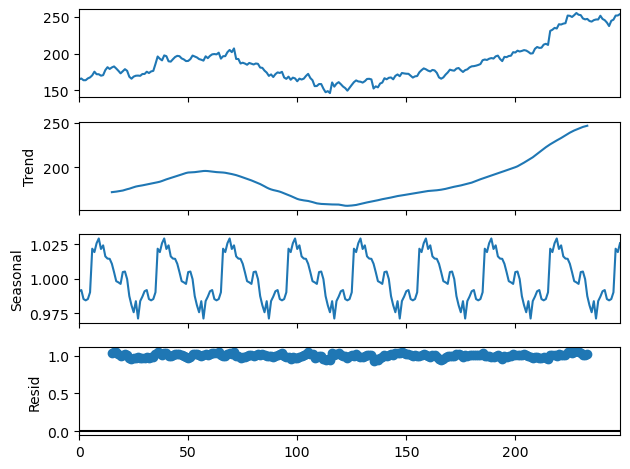

In [25]:
#fig.set_size_inches(15,10),dpi=120
plt.figure(figsize=(12, 6), dpi=120)
fig = result.plot()


So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Now here’s how to find the value of p:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

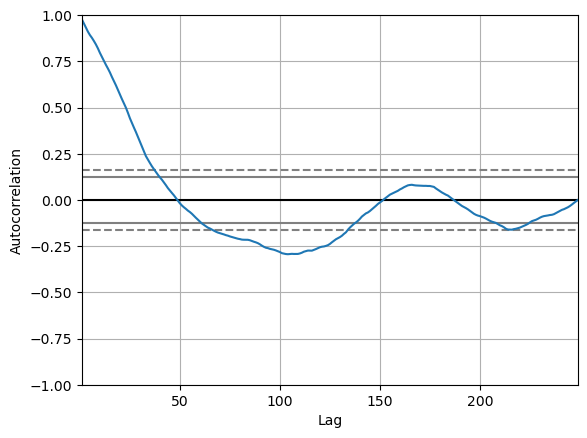

In [26]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

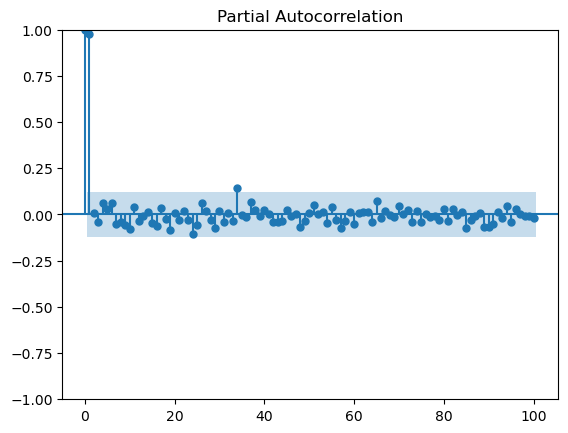

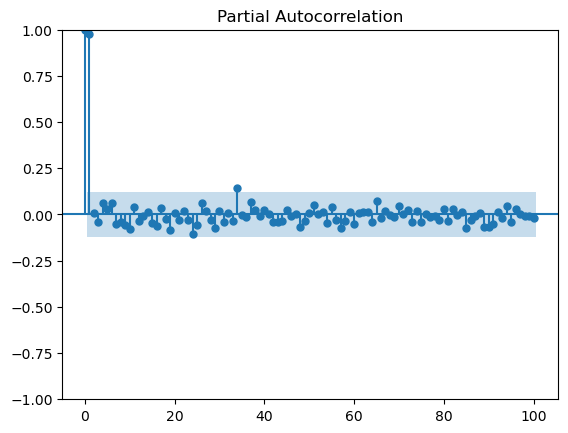

In [28]:
plot_pacf(data["Close"],lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [29]:
p,d,q=5,1,2

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

C:\Users\Mugeesuddin16\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  249
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -672.575
Date:                Sun, 19 Oct 2025   AIC                           1361.150
Time:                        21:18:19   BIC                           1389.258
Sample:                             0   HQIC                          1372.465
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5150      0.072     -7.186      0.000      -0.655      -0.375
ar.L2         -0.9036      0.083    -10.846      0.000      -1.067      -0.740
ar.L3         -0.0445      0.104     -0.429      0.6

C:\Users\Mugeesuddin16\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Here’s how to predict the values using the ARIMA model:

In [32]:
predictions = fitted.predict()

In [33]:
print(predictions)

0        0.000000
1      165.077504
2      166.088293
3      163.835916
4      163.595509
          ...    
244    237.675911
245    244.896992
246    246.649158
247    250.999186
248    252.805964
Name: predicted_mean, Length: 249, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [34]:
import statsmodels.api as sm

In [35]:
import warnings

In [36]:
model=sm.tsa.statespace.SARIMAX(data['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))

In [2]:
#fitted_model = model.fit()

In [3]:
#model=model.fit()

In [49]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  249
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -656.932
Date:                            Sun, 19 Oct 2025   AIC                           1343.863
Time:                                    21:25:41   BIC                           1395.821
Sample:                                         0   HQIC                          1364.808
                                            - 249                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9102      0.260     -3.495      0.000      -1.421      -0.400
ar.L2         -0.7413      0.198   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:

In [50]:
predictions = model.predict(len(data),len(data)+10)

In [51]:
print(predictions)

249    253.258899
250    253.312683
251    253.611763
252    256.067162
253    256.588144
254    256.398895
255    254.385738
256    256.035960
257    255.862340
258    256.768389
259    256.983066
Name: predicted_mean, dtype: float64


Here’s how you can plot the predictions:

<Axes: >

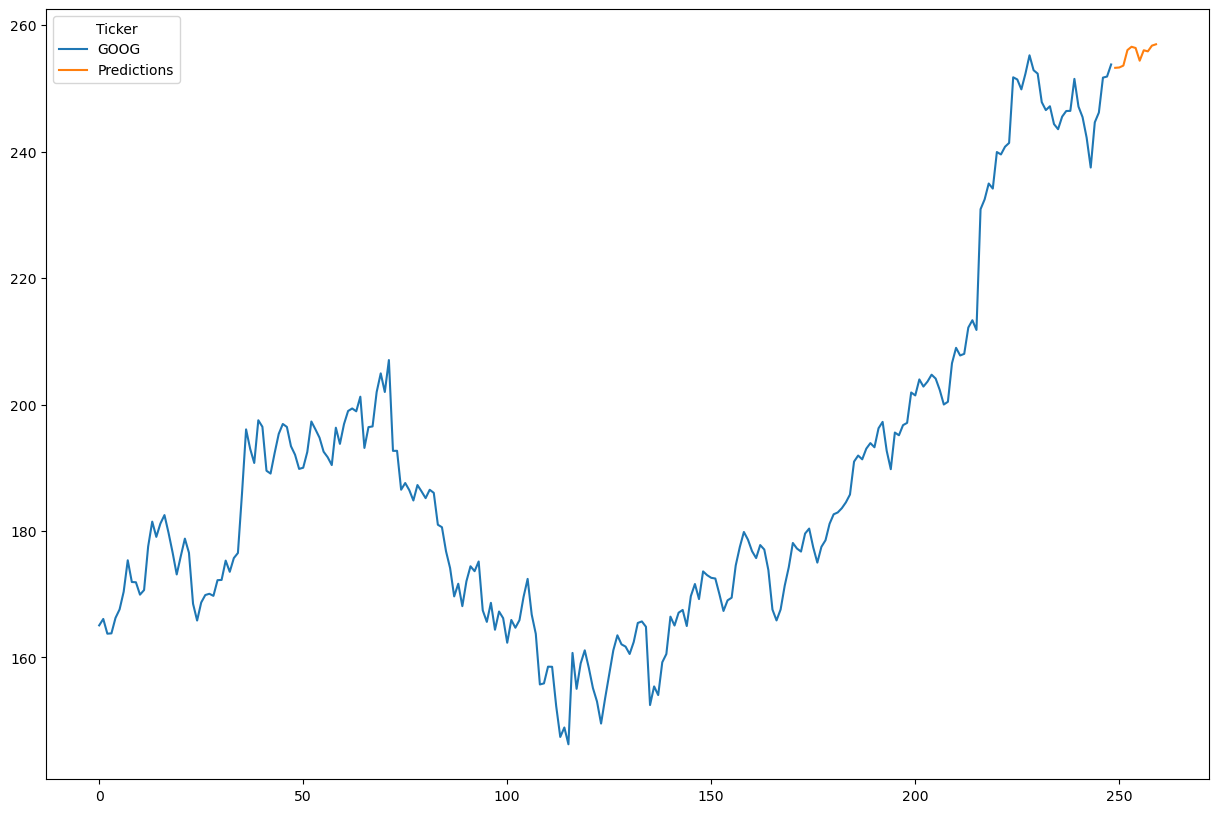

In [52]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15,10))
predictions.plot(legend=True,label="Predictions")

<Axes: >

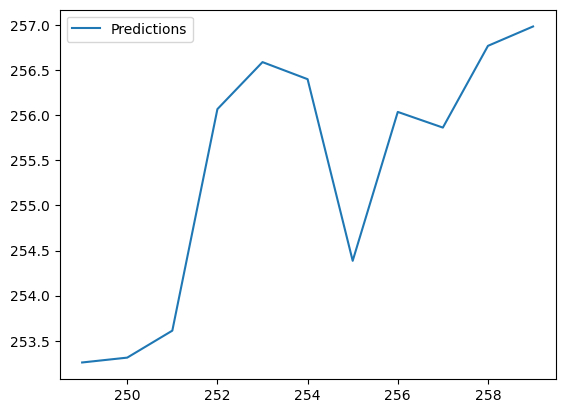

In [53]:
predictions.plot(legend=True,label="Predictions")

C:\Users\Mugeesuddin16\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mugeesuddin16\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mugeesuddin16\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  249
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -675.203
Date:                Sun, 19 Oct 2025   AIC                           1362.406
Time:                        21:27:15   BIC                           1383.486
Sample:                             0   HQIC                          1370.892
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0085      0.067     -0.127      0.899      -0.140       0.123
ar.L2          0.0591      0.077      0.770      0.441      -0.091       0.210
ar.L3         -0.0743      0.069     -1.073      0.2

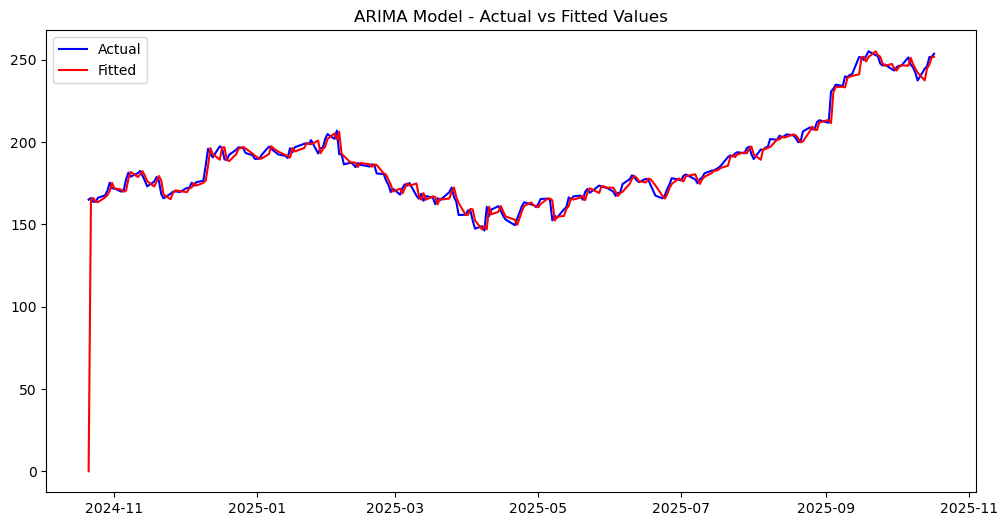

In [54]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Set index (if not already)
data.set_index("Date", inplace=True)

# Step 2: Build the model
p, d, q = 5, 1, 0
model = ARIMA(data["Close"], order=(p, d, q))

# Step 3: Fit the model (run once)
fitted_model = model.fit()

# Step 4: View summary
print(fitted_model.summary())

# Step 5: Plot actual vs fitted
plt.figure(figsize=(12,6))
plt.plot(data["Close"], label='Actual', color='blue')
plt.plot(fitted_model.fittedvalues, label='Fitted', color='red')
plt.title("ARIMA Model - Actual vs Fitted Values")
plt.legend()
plt.show()


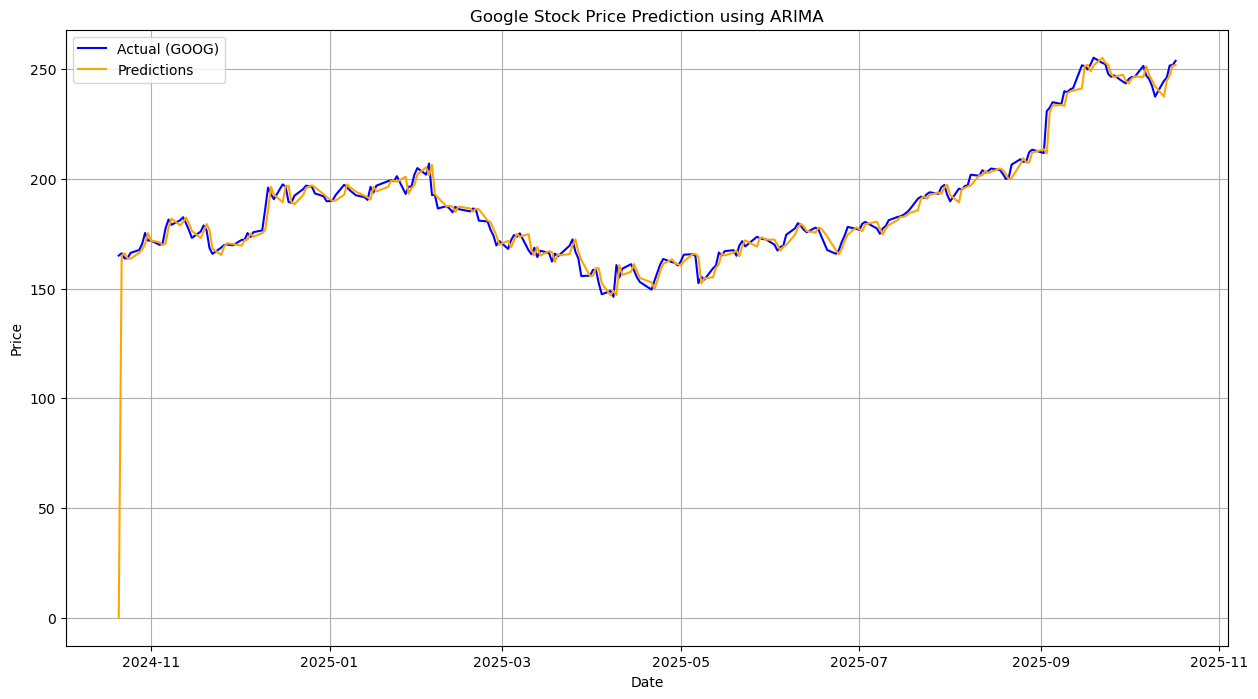

In [55]:
import matplotlib.pyplot as plt

# Generate predictions with matching index
predictions = fitted_model.predict(start=data.index[0], end=data.index[-1])

# Plot properly
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Close'], label="Actual (GOOG)", color="blue")
plt.plot(predictions.index, predictions, label="Predictions", color="orange")

plt.title("Google Stock Price Prediction using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


So this is how you can use ARIMA or SARIMA models for Time Series Forecasting using Python.

# Summary

ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA). I hope you liked this article about Time Series Forecasting with ARIMA using Python.

![Alt Text]("C:\Users\Mugeesuddin16\OneDrive\Pictures\Screenshots\Screenshot 2025-10-26 205711.png")